# Regresión Logística


## Importar librerías

In [1]:
from sklearn.datasets import load_digits # dataset a utilizar
import pandas as pd                      # manipulacion da datos
import matplotlib.pyplot as plt          # Visualizacion de datos
import seaborn as sns                    # Visualizacion de datos
import numpy as np                       # modificar arreglos
from sklearn.linear_model import LogisticRegression # aplicar la regresion logistica

## Carga de datos

In [2]:
# cargamos los datos de SKlearn
digits = load_digits()

In [3]:
# cargamos uno de los datos
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
# modificamos la forma del dato a 8x8 ya que la documentacion indica
# que en esa dimension se visualizan los digitos
image = np.reshape(digits.data[0],(8,8))

In [9]:
# mismo array pero esta vez 8x8
image

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

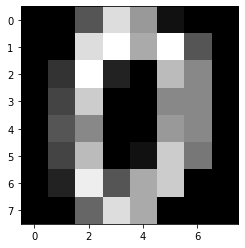

In [10]:
# mostrar la imagen en un mapa de colores gris
plt.imshow(image,cmap='gray');

La imagen muestra aparentemente un cero. Para verificarlo procedemos como sigue:

In [11]:
# Utilizamos la propiedad target
digits.target[0]

0

Efectivamente es un cero.

Probemos con el datapoint 25.

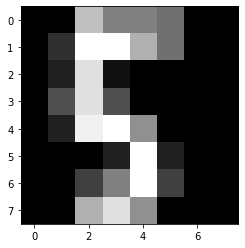

In [12]:
image = np.reshape(digits.data[25],(8,8))

plt.imshow(image,cmap='gray');

Aparentemente es el 5. Verifiquemos que sea cierto.

In [13]:
digits.target[25]

5

Efectivamente es el 5

## Split de datos en train y test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

## Entrenamiento de modelo

In [ ]:
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

## Evaluación del modelo

In [ ]:
predictions = logistic_reg.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)


In [ ]:
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]])

Text(0.5, 103.73999999999997, 'Predicted label')

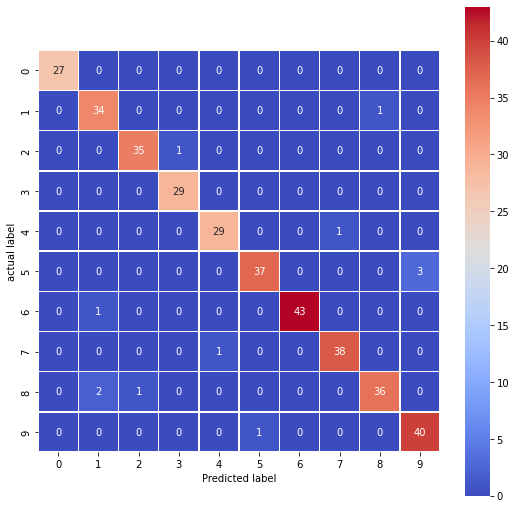

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='coolwarm')
plt.ylabel('actual label')
plt.xlabel('Predicted label')